In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [69]:
data = pd.read_csv('train.csv')

In [56]:
data.head()

,ID,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,...,Job Code,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
0,9248,Fiscal,2017,3,Human Welfare & Neighborhood Development,DSS,HSA Human Services Agency,535,"SEIU - Human Services, Local 1021",2900,...,2905,Senior Eligibility Worker,41351,0.00,240.00,11896.36,13765.55,5248.43,30910.34,2
1,44541,Fiscal,2014,6,General Administration & Finance,ASR,ASR Assessor / Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",4200,...,4222,Sr Personal Property Auditor,41792,0.00,400.00,15429.94,9337.37,5599.01,30366.32,2
2,47031,Fiscal,2014,3,Human Welfare & Neighborhood Development,DSS,HSA Human Services Agency,535,"SEIU - Human Services, Local 1021",2900,...,2910,Social Worker,9357,0.00,1080.00,9682.00,8848.03,3463.92,21993.95,2
3,139416,Fiscal,2014,1,Public Protection,FIR,FIR Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,...,H002,Firefighter,28022,25730.46,18414.18,24222.26,13911.13,2416.58,40549.97,3
4,123780,Fiscal,2013,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,790,"SEIU - Miscellaneous, Local 1021",1600,...,1224,Pr Payroll & Personnel Clerk,51052,1138.28,2148.11,15437.62,12828.15,7246.54,35512.31,3


In [4]:
data.shape

(149087, 21)

In [5]:
data.isnull().sum()

ID                         0
Year Type                  0
Year                       0
Organization Group Code    0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family Code            0
Job Family                 0
Job Code                   0
Job                        0
Employee Identifier        0
Overtime                   0
Other Salaries             0
Retirement                 0
Health/Dental              0
Other Benefits             0
Total Benefits             0
Class                      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149087 entries, 0 to 149086
Data columns (total 21 columns):
ID                         149087 non-null int64
Year Type                  149087 non-null object
Year                       149087 non-null int64
Organization Group Code    149087 non-null int64
Organization Group         149087 non-null object
Department Code            149087 non-null object
Department                 149087 non-null object
Union Code                 149087 non-null int64
Union                      149087 non-null object
Job Family Code            149087 non-null object
Job Family                 149087 non-null object
Job Code                   149087 non-null object
Job                        149087 non-null object
Employee Identifier        149087 non-null int64
Overtime                   149087 non-null float64
Other Salaries             149087 non-null float64
Retirement                 149087 non-null float64
Health/Dental              149087 non-nul

In [70]:
data.drop(['Year Type', 'Organization Group', 'Department', 'Union', 'Job Family', 'Job'], axis=1, inplace=True)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174428 entries, 0 to 174427
Data columns (total 15 columns):
ID                         174428 non-null int64
Year                       174428 non-null int64
Organization Group Code    174428 non-null int64
Department Code            174428 non-null object
Union Code                 174428 non-null int64
Job Family Code            174428 non-null object
Job Code                   174428 non-null object
Employee Identifier        174428 non-null int64
Overtime                   174428 non-null float64
Other Salaries             174428 non-null float64
Retirement                 174428 non-null float64
Health/Dental              174428 non-null float64
Other Benefits             174428 non-null float64
Total Benefits             174428 non-null float64
Class                      174428 non-null int64
dtypes: float64(6), int64(6), object(3)
memory usage: 20.0+ MB


In [72]:
le = LabelEncoder()
data['Department Code'] = le.fit_transform(data['Department Code'])
data['Job Family Code'] = le.fit_transform(data['Job Family Code'])
data['Job Code'] = le.fit_transform(data['Job Code'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174428 entries, 0 to 174427
Data columns (total 15 columns):
ID                         174428 non-null int64
Year                       174428 non-null int64
Organization Group Code    174428 non-null int64
Department Code            174428 non-null int32
Union Code                 174428 non-null int64
Job Family Code            174428 non-null int32
Job Code                   174428 non-null int32
Employee Identifier        174428 non-null int64
Overtime                   174428 non-null float64
Other Salaries             174428 non-null float64
Retirement                 174428 non-null float64
Health/Dental              174428 non-null float64
Other Benefits             174428 non-null float64
Total Benefits             174428 non-null float64
Class                      174428 non-null int64
dtypes: float64(6), int32(3), int64(6)
memory usage: 18.0 MB


In [49]:
data.head()

,ID,Year,Organization Group Code,Department Code,Union Code,Job Family Code,Job Code,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
0,9248,2017,3,22,535,18,373,0.00,240.00,11896.36,13765.55,5248.43,30910.34,2
1,44541,2014,6,5,21,25,509,0.00,400.00,15429.94,9337.37,5599.01,30366.32,2
2,47031,2014,3,22,535,18,377,0.00,1080.00,9682.00,8848.03,3463.92,21993.95,2
3,139416,2014,1,28,798,53,1096,25730.46,18414.18,24222.26,13911.13,2416.58,40549.97,3
4,123780,2013,2,37,790,6,60,1138.28,2148.11,15437.62,12828.15,7246.54,35512.31,3


In [50]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,149087.0,106616.273807,61550.046783,0.00,53204.500,106623.00,159919.500,213201.00
Year,149087.0,2015.072018,1.410452,2013.00,2014.000,2015.00,2016.000,2017.00
Organization Group Code,149087.0,2.976980,1.582080,1.00,2.000,2.00,4.000,7.00
Department Code,149087.0,28.015689,13.291544,0.00,20.000,23.00,37.000,55.00
Union Code,149087.0,491.154963,333.914881,1.00,216.000,535.00,790.000,990.00
Job Family Code,149087.0,29.772053,17.921042,0.00,12.000,29.00,47.000,61.00
Job Code,149087.0,639.181572,366.845032,0.00,310.000,619.00,994.000,1140.00
Overtime,149087.0,4511.488439,11361.792998,-12308.66,0.000,0.00,2872.240,227313.62
Other Salaries,149087.0,3754.638895,7516.445237,-19131.10,0.000,698.35,4558.190,336726.34
Retirement,149087.0,12632.395320,9657.913757,-28723.19,3228.975,12839.71,19137.745,101306.01


In [109]:
# data['Total Benefits'] = pd.DataFrame(np.where(data['Total Benefits']<0, , data['Total Benefits']))

In [125]:
# for column in data:
#     data.drop(data.loc[data[column] <0].index, inplace=True)

In [1]:
for column in data:
    if data[column].dtype =='int64' or data[column].dtype =='float64':
        print(column, data.ID[data[column]<0].count())

NameError: name 'data' is not defined

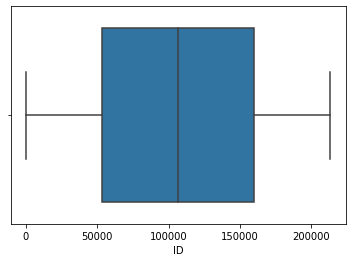

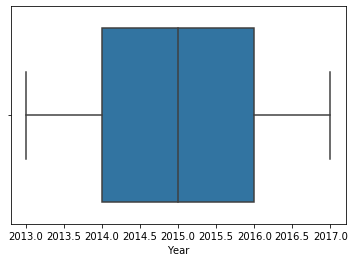

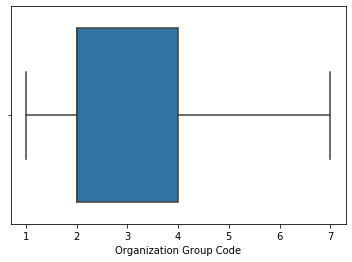

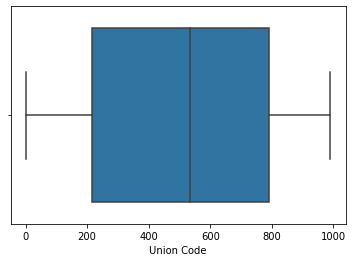

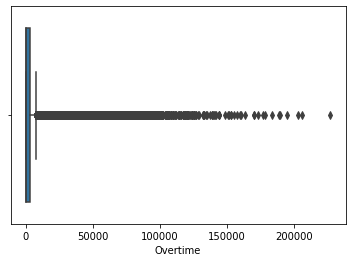

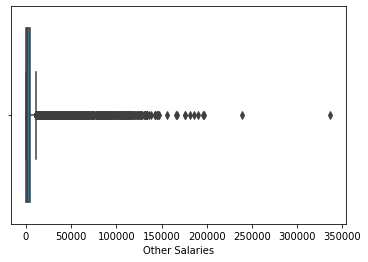

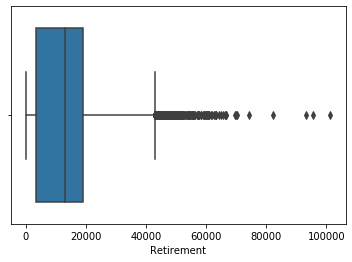

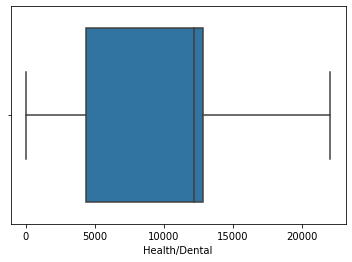

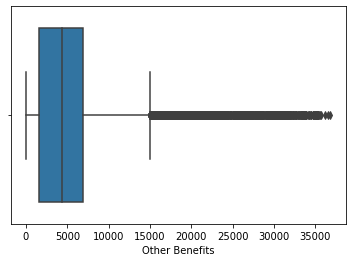

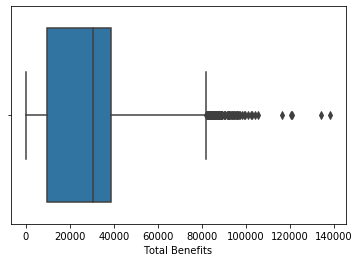

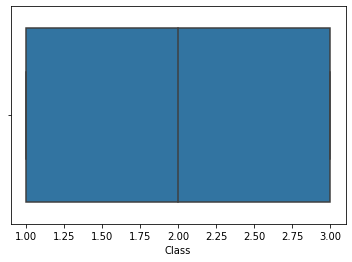

In [129]:
# checking for outliers
for column in data:
    if data[column].dtype =='int64' or data[column].dtype =='float64':
        plt.figure()
        sns.boxplot(data[column])
        plt.show()

In [269]:
# sns.pairplot(data, hue='Class')

In [12]:
corr_data = data.corr()
corr_data

,ID,Year,Organization Group Code,Department Code,Union Code,Job Family Code,Job Code,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
ID,1.000000,-0.001357,0.000236,-0.000535,0.000060,-0.000149,0.000349,-0.000923,-0.000117,-0.000977,-0.001286,-0.002918,-0.001621,0.000525
Year,-0.001357,1.000000,-0.004740,0.000745,0.001289,-0.003428,-0.000004,0.026987,-0.009350,0.001891,0.046810,0.055071,0.027827,0.023302
Organization Group Code,0.000236,-0.004740,1.000000,-0.229052,-0.007327,-0.527570,-0.432184,-0.301712,-0.226052,-0.243119,-0.231393,0.022912,-0.202476,-0.223910
Department Code,-0.000535,0.000745,-0.229052,1.000000,0.061218,0.258707,0.224533,0.183861,0.083146,0.025114,-0.005881,-0.128917,-0.017411,0.003700
Union Code,0.000060,0.001289,-0.007327,0.061218,1.000000,0.055210,0.133388,0.061510,0.167970,-0.079131,-0.083012,-0.285390,-0.136384,-0.088473
Job Family Code,-0.000149,-0.003428,-0.527570,0.258707,0.055210,1.000000,0.855668,0.316131,0.186080,0.151371,0.085329,-0.058150,0.098376,0.106058
Job Code,0.000349,-0.000004,-0.432184,0.224533,0.133388,0.855668,1.000000,0.289687,0.168297,0.049885,-0.030261,-0.102232,-0.004287,0.036844
Overtime,-0.000923,0.026987,-0.301712,0.183861,0.061510,0.316131,0.289687,1.000000,0.361632,0.314432,0.308647,0.061956,0.285985,0.288897
Other Salaries,-0.000117,-0.009350,-0.226052,0.083146,0.167970,0.186080,0.168297,0.361632,1.000000,0.349144,0.216293,0.054032,0.276517,0.317438
Retirement,-0.000977,0.001891,-0.243119,0.025114,-0.079131,0.151371,0.049885,0.314432,0.349144,1.000000,0.787526,0.671137,0.962205,0.872818


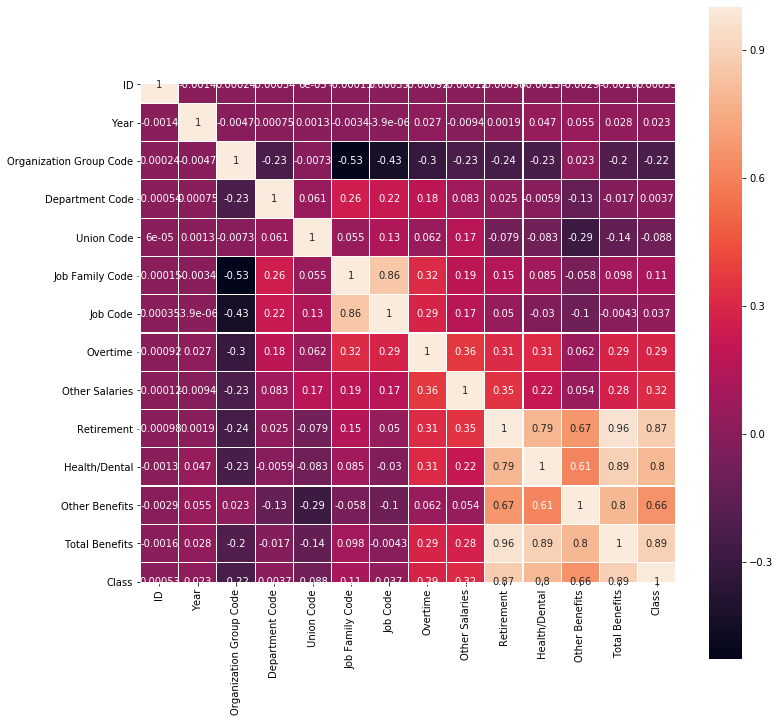

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(corr_data, annot=True, linewidths=.1, square=True)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [73]:
Y = data['Class']
X = data.drop('Class', axis=1)

In [75]:
test_data = pd.read_csv('test.csv' )

In [85]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
sc = StandardScaler()

In [87]:
scaledX = sc.fit_transform(X)
scaledtest = sc.fit_transform(test_data)


C:\Users\vikab\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vikab\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\vikab\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vikab\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [76]:
test_data.drop(['Year Type', 'Organization Group', 'Department', 'Union', 'Job Family', 'Job'], axis=1, inplace=True)

In [81]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63895 entries, 0 to 63894
Data columns (total 14 columns):
ID                         63895 non-null int64
Year                       63895 non-null int64
Organization Group Code    63895 non-null int64
Department Code            63895 non-null object
Union Code                 63895 non-null int64
Job Family Code            63895 non-null object
Job Code                   63895 non-null object
Employee Identifier        63895 non-null int64
Overtime                   63895 non-null float64
Other Salaries             63895 non-null float64
Retirement                 63895 non-null float64
Health/Dental              63895 non-null float64
Other Benefits             63895 non-null float64
Total Benefits             63895 non-null float64
dtypes: float64(6), int64(5), object(3)
memory usage: 6.8+ MB


In [82]:
test_data['Department Code'] = le.fit_transform(test_data['Department Code'])
test_data['Job Family Code'] = le.fit_transform(test_data['Job Family Code'])
test_data['Job Code'] = le.fit_transform(test_data['Job Code'])

In [153]:
# scaled_testx = sc.fit_transform(test_data)

C:\Users\vikab\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vikab\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [209]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy')

In [39]:
clf = clf.fit(X, Y)
clf

NameError: name 'clf' is not defined

In [211]:
clf.feature_importances_

array([0.00288349, 0.01422775, 0.00248022, 0.00159712, 0.05972764,
       0.00351032, 0.00754793, 0.01786509, 0.01847824, 0.72853673,
       0.0254059 , 0.10806014, 0.00967943])

In [212]:
predictions = clf.predict(test_data)

In [213]:
predictions

array([1, 3, 2, ..., 2, 2, 3], dtype=int64)

In [215]:
pd.DataFrame(predictions).to_csv("out.csv")

In [77]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(n_estimators=70)
random_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [89]:
random_clf = random_clf.fit(scaledX, Y)

In [90]:
random_clf.feature_importances_

array([0.00465098, 0.00873849, 0.00976893, 0.00632439, 0.02668465,
       0.01810473, 0.0282621 , 0.00469353, 0.01876845, 0.03388806,
       0.22189133, 0.10863527, 0.19283051, 0.31675857])

In [91]:
random_predictions = random_clf.predict(scaledtest)


In [92]:
pd.DataFrame(random_predictions).to_csv("out111111_rf.csv")

In [24]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(random_state = 42)
# from pprint import pprint
# # Look at parameters used by our current forest
# print('Parameters currently in use:\n')
# pprint(rf.get_params())

In [274]:
# from sklearn.model_selection import RandomizedSearchCV


In [275]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid

In [277]:
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X, Y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
